In [3]:
%reload_ext autoreload
%autoreload 2
from backend import load_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
client_profiles, df_web_data_pt1, df_web_data_pt2, experiment_roster, digital_footprints, client_footprints, grouped_data = load_data()

In [ ]:
grouped_data.columns

In [ ]:
client_profiles.head()

In [ ]:
client_profiles.dtypes
# you can find the years here

In [ ]:
df_web_data_pt1.head()

In [ ]:
df_web_data_pt1.dtypes

In [ ]:
df_web_data_pt2.head()

In [ ]:
df_web_data_pt2.dtypes

In [ ]:
grouped_data['date_time_x'][1].year

In [ ]:
experiment_roster.head()

In [ ]:
experiment_roster.dtypes

In [ ]:
digital_footprints.head()
# complex and heavy one 

In [ ]:
digital_footprints.dtypes

In [ ]:
experiment_roster.head()
# control & test group

In [ ]:
client_footprints

# Exploring data types & missing values

In [5]:
client_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [ ]:
client_profiles.columns

In [ ]:
digital_footprints.info()

In [ ]:
digital_footprints.columns

In [ ]:
digital_footprints['date_time_x']

In [ ]:
experiment_roster.info()

In [ ]:
experiment_roster.columns

In [ ]:
client_footprints

In [ ]:
grouped_data

Observation - there are null values on test variation

In [ ]:
# Spotting duplicates
grouped_data.duplicated().sum()

In [ ]:
grouped_data.describe()

In [6]:
# Categorical
grouped_data.select_dtypes("object").columns

Index(['gendr', 'visitor_id_x', 'visit_id_x', 'process_step_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'Variation'],
      dtype='object')

In [7]:
grouped_data.select_dtypes("object").nunique().sort_values(ascending=False)

visit_id_x        7884
visit_id_y        7101
visitor_id_x      6066
visitor_id_y      5810
process_step_x       5
process_step_y       5
gendr                4
Variation            2
dtype: int64

In [ ]:
# Numerical to do 
# Client_id is usually CATEGORICAL
grouped_data.select_dtypes("number").columns

In [8]:
grouped_data.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           5289
bal                 5288
clnt_tenure_mnth     402
clnt_age             152
clnt_tenure_yr        44
logons_6_mnth          9
calls_6_mnth           8
num_accts              5
dtype: int64

In [ ]:
# X ? Outlier
grouped_data['gendr'].value_counts()

In [ ]:
# Identifying columns in the dataframe where over 80% of the values are missing
grouped_data.columns[grouped_data.isnull().mean() > 0.8]

In [ ]:
grouped_data['Variation'].describe()

In [ ]:
# Seeing the A/B groups
grouped_data['Variation'].value_counts()

In [ ]:
# Notes 2 self:
# - Create a dataframe with a/b test subjects

In [ ]:
# Questions:
1. Who are the primary clients using this online process?
 
    # gendr, bal

2. Are the primary clients younger or older, new or long-standing?

    # clnt_tenure_yr, clnt_tenure_mnth, clnt_age, 

# Exploring client data

In [9]:
client_profiles.value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal        calls_6_mnth  logons_6_mnth
169        21.0            262.0             47.5      M      2.0        501570.72  4.0           4.0              1
6663225    16.0            193.0             40.5      F      2.0        47445.45   2.0           5.0              1
6664483    22.0            271.0             46.5      M      4.0        699384.16  6.0           9.0              1
6664376    17.0            207.0             64.0      M      2.0        311829.13  7.0           7.0              1
6664052    32.0            394.0             71.0      M      2.0        79642.36   0.0           4.0              1
                                                                                                                  ..
3360049    16.0            203.0             35.5      F      2.0        53572.85   0.0           3.0              1
3360254    6.0             73.0              19.0      U      2.0    

# Visualize Data

Numerical Measures: These can include coefficients, frequency counts, and other statistical metrics.

Visual Representations: Examples are histograms, scatter plots, pie charts, and more.

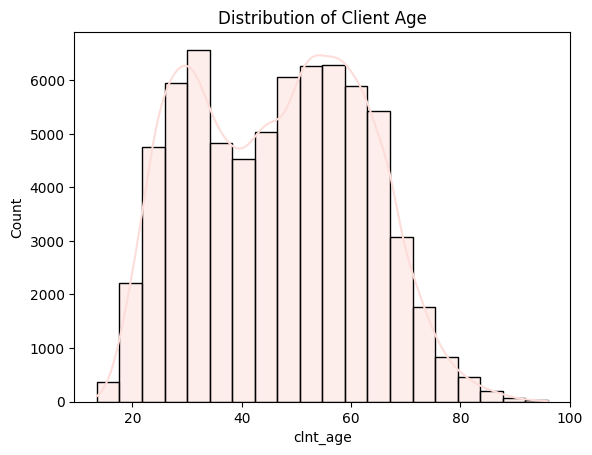

In [50]:
sns.set_palette("RdPu")
sns.histplot(client_profiles['clnt_age'], bins=20, kde=True)
plt.title('Distribution of Client Age')
plt.show()

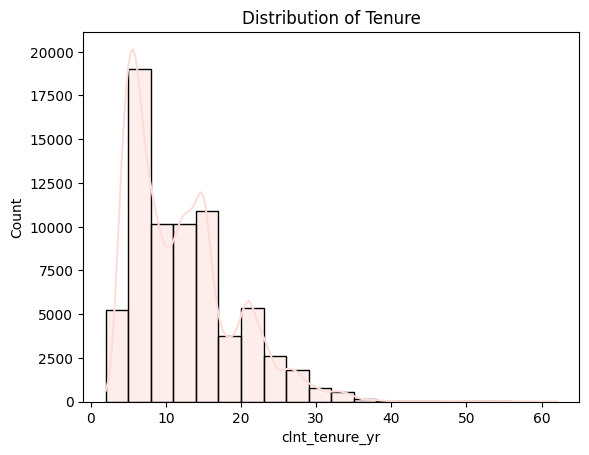

In [51]:
sns.set_palette("RdPu")
sns.histplot(client_profiles['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
# Vanguard has been around for 48 years, founded in 1975

In [12]:
# Segmenting Clients
client_profiles['age_group'] = pd.cut(client_profiles['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [13]:
client_profiles['age_group']

0        60-70
1        50-60
2        30-40
3        40-50
4        30-40
         ...  
70604    30-40
70605    30-40
70606    60-70
70607    60-70
70608    50-60
Name: age_group, Length: 70609, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

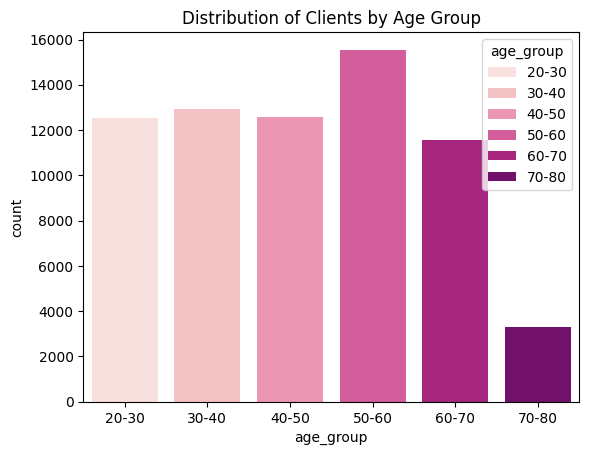

In [22]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=client_profiles, hue='age_group')
plt.title('Distribution of Clients by Age Group')

In [ ]:
# Exploring Client Tenure

Text(0.5, 1.0, 'Age vs. Tenure')

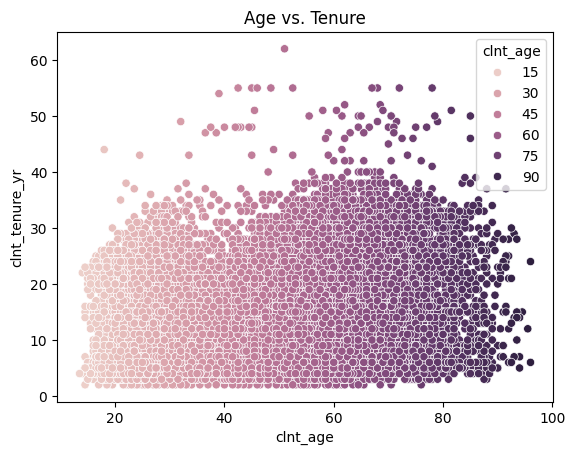

In [21]:
sns.set_palette("RdPu")
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=client_profiles, hue='clnt_age')
plt.title('Age vs. Tenure')

In [ ]:
# Comparing the groups

In [ ]:
sns.boxplot(x='Variation', y='clnt_age', data=grouped_data)
plt.title('Age Distribution by A/B Test')

# Performing Client Behavior Analysis

In [ ]:
# Key Metrics

Text(0.5, 1.0, 'Number of Logons in the Last 6 Months by Variation')

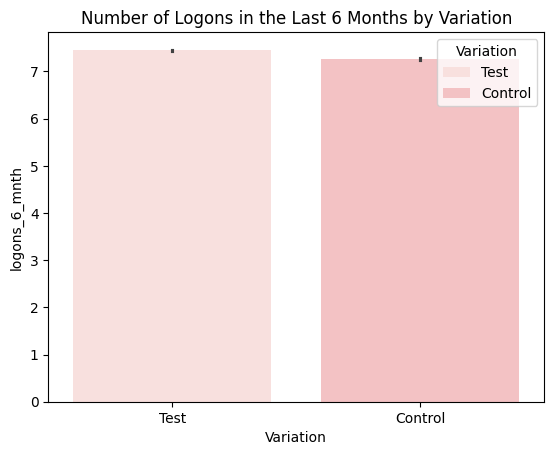

In [25]:
sns.set_palette("RdPu")
sns.barplot(x='Variation', y='logons_6_mnth', data=grouped_data, hue='Variation')
plt.title('Number of Logons in the Last 6 Months by Variation')

Text(0.5, 1.0, 'Number of Calls in the Last 6 Months by Variation')

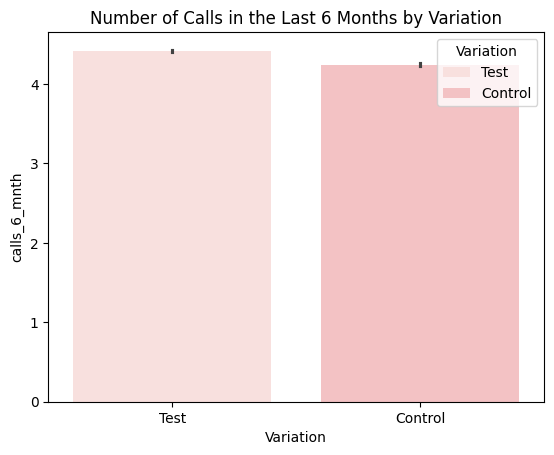

In [26]:
sns.set_palette("RdPu")
sns.barplot(x='Variation', y='calls_6_mnth', data=grouped_data, hue='Variation')
plt.title('Number of Calls in the Last 6 Months by Variation')

In [ ]:
# Data for login information for each group variation during A/B testing

In [ ]:
####### This code is for interactive visualization on dashboard #####################################

In [ ]:
# Merging both datetimes into columns
grouped_data['datetime'] = grouped_data['date_time_x'].combine_first(grouped_data['date_time_y'])

In [ ]:
grouped_data['Variation'].isna().sum()

In [ ]:
# Filtering datetime -- unecessary 
ab_test_data = grouped_data[(grouped_data['date_time_x'] >= '2017-03-15') & (grouped_data['date_time_x'] <= '2017-06-20')]
ab_test_data

In [ ]:
test_data = ab_test_data[ab_test_data['Variation'] == 'Test']
test_data

In [ ]:
control_data = ab_test_data[ab_test_data['Variation'] == 'Control']
control_data

In [ ]:
downsampled_test_data = test_data.iloc[::5]
downsampled_test_data

In [ ]:
downsampled_control_data = control_data.iloc[::5]
downsampled_control_data

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_test_data)
plt.title('Number of Visits Over Time - Test Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
plt.subplot(1, 2, 2)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_control_data)
plt.title('Number of Visits Over Time - Control Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
##########################################################################################

In [27]:
conversion_rates = grouped_data.groupby('Variation')['process_step_x'].value_counts(normalize=True).unstack()
desired_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
conversion_rates = conversion_rates[desired_order]
conversion_rates

process_step_x,start,step_1,step_2,step_3,confirm
Variation,,,,,
Control,0.547151,0.201349,0.143788,0.090690,0.017021
Test,0.460464,0.240446,0.160642,0.091346,0.047104


Text(0.5, 1.0, 'Completion Rates by Process Step and Test Group')

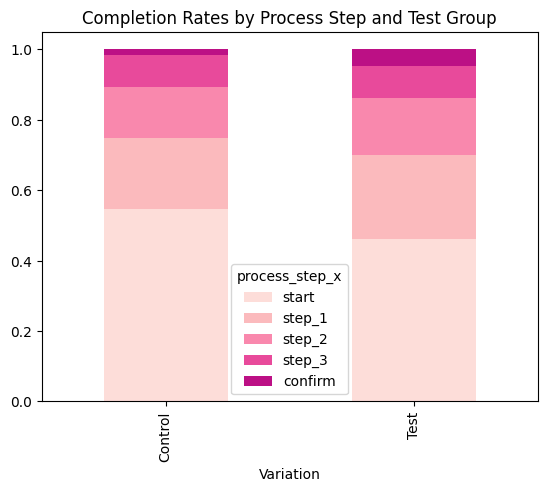

In [29]:
sns.set_palette("RdPu")
conversion_rates.plot(kind='bar', stacked=True)
plt.title('Conversion Rates by Process Step and Variation')
plt.title('Completion Rates by Process Step and Test Group')

In [30]:
grouped_data['age_group'] = pd.cut(grouped_data['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
grouped_data['age_group']

0         30-40
1         30-40
2         30-40
3         30-40
4         30-40
          ...  
155568    30-40
155569    30-40
155570    30-40
155571    30-40
155572    30-40
Name: age_group, Length: 155573, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Number of Logons by Age Group and Test Group')

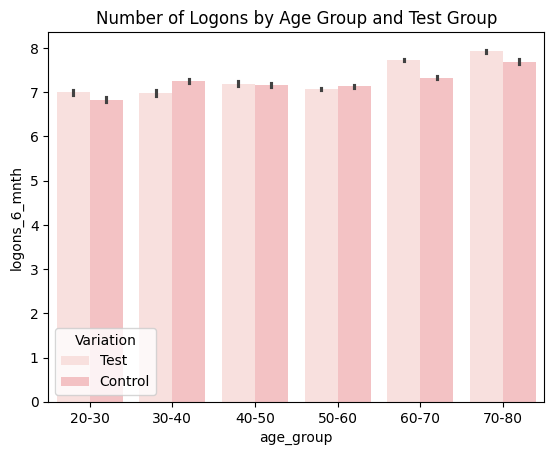

In [31]:
sns.set_palette("RdPu")
sns.barplot(x='age_group', y='logons_6_mnth', hue='Variation', data=grouped_data)
plt.title('Number of Logons by Age Group and Test Group')

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

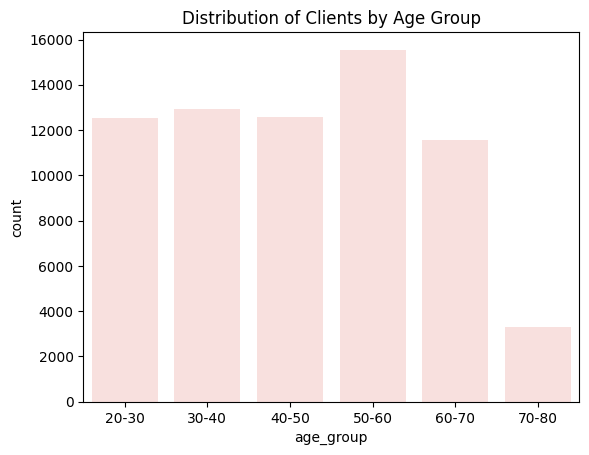

In [32]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=client_profiles)
plt.title('Distribution of Clients by Age Group')

In [ ]:
# check the relationship of 70-80 age group and logons
# you are required to confirm if this difference is statistically significant.

# Delving into KPI's

Completion Rate

In [33]:
test_data = grouped_data[grouped_data['Variation'] == 'Test']
test_completion_rate = test_data[test_data['process_step_x'] == 'confirm'].shape[0] / test_data.shape[0]
print(f"Completion Rate (Test): {test_completion_rate:.2%}")

Completion Rate (Test): 4.71%


In [34]:
control_data = grouped_data[grouped_data['Variation'] == 'Control']
control_completion_rate = control_data[control_data['process_step_x'] == 'confirm'].shape[0] / control_data.shape[0]
print(f"Completion Rate (Control): {control_completion_rate:.2%}")

Completion Rate (Control): 1.70%


In [90]:
def calculate_completion_rate(data):
    # Count the number of users who reached the 'confirm' step
    confirm_step_users = data[data['process_step'] == 'confirm']['client_id'].nunique()

    # Count the total number of users
    total_users = data['client_id'].nunique()

    # Calculate the completion rate as a percentage
    completion_rate_percentage = (confirm_step_users / total_users) * 100

    return completion_rate_percentage

In [91]:
completion_rate_test = calculate_completion_rate(test_data)
print("Completion Rate (Test):")
print(completion_rate_test)

Completion Rate (Test):
69.29323642835953


In [92]:
completion_rate_control = calculate_completion_rate(control_data)
print("\nCompletion Rate (Control):")
print(completion_rate_control)


Completion Rate (Control):
65.58728539860616


Time spent on each step

In [35]:
web_data = pd.concat([df_web_data_pt1,df_web_data_pt2])

In [36]:
web_data = pd.merge(web_data, experiment_roster, on='client_id', how='inner')

In [37]:
web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [38]:
web_data.reset_index(drop=True, inplace=True)

In [39]:
grouped_data.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'visitor_id_x',
       'visit_id_x', 'process_step_x', 'date_time_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'date_time_y', 'Variation',
       'age_group'],
      dtype='object')

In [40]:
web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [41]:
web_data['time_spent_on_step'] = web_data.groupby('client_id')['date_time'].diff()

In [46]:
web_data['time_spent_on_step']

0                      NaT
1        -1 days +23:59:44
2        -1 days +23:52:31
3        -1 days +23:59:51
4        -1 days +23:58:51
                ...       
449826   -1 days +23:57:00
449827   -1 days +23:58:28
449828   -1 days +23:59:28
449829   -1 days +23:59:55
449830   -1 days +23:54:05
Name: time_spent_on_step, Length: 449831, dtype: timedelta64[ns]

In [43]:
average_time_spent = web_data.groupby(['Variation', 'process_step'])['time_spent_on_step'].mean().reset_index()

In [44]:
average_time_spent

,Variation,process_step,time_spent_on_step
0,Control,confirm,9 days 12:45:21.393020281
1,Control,start,0 days 12:08:42.464061324
2,Control,step_1,0 days 07:11:47.159839796
3,Control,step_2,0 days 01:16:10.175066634
4,Control,step_3,0 days 02:10:09.278050173
5,Test,confirm,5 days 23:26:23.550332778
6,Test,start,0 days 09:17:27.053622956
7,Test,step_1,0 days 02:54:46.601001033
8,Test,step_2,0 days 01:35:27.801749659
9,Test,step_3,0 days 02:54:23.903277084


In [ ]:
# Start, Step_1, Confirm = faster with Test Group
# Step 2, step 3  = faster with Control Group

In [ ]:
# For each visit calculate the time difference between consecutive steps.

In [ ]:
# Then average these time differences for each step across all visits.

In [ ]:
# This does not directly use probability, but averages (or means) to understand typical user behavior.

In [102]:
def calculate_avg_time_per_step(data):
    # Calculate the time spent on each step
    data['time_spent_on_step'] = data.groupby('client_id')['date_time'].diff()

    # Calculate the average time spent on each step
    avg_time_per_step = data.groupby('process_step')['time_spent_on_step'].mean()

    return avg_time_per_step

In [103]:
test_data_copy = test_data.copy()
avg_time_per_step_test = calculate_avg_time_per_step(test_data_copy)
print("Average Time Spent per Step (Test):")
print(avg_time_per_step_test)

Average Time Spent per Step (Test):
process_step
confirm   5 days 23:26:23.550332778
start     0 days 09:17:27.053622956
step_1    0 days 02:54:46.601001033
step_2    0 days 01:35:27.801749659
step_3    0 days 02:54:23.903277084
Name: time_spent_on_step, dtype: timedelta64[ns]


In [104]:
control_data_copy = control_data.copy()
avg_time_per_step_control = calculate_avg_time_per_step(control_data_copy)
print("\nAverage Time Spent per Step (Control):")
print(avg_time_per_step_control)


Average Time Spent per Step (Control):
process_step
confirm   9 days 12:45:21.393020281
start     0 days 12:08:42.464061324
step_1    0 days 07:11:47.159839796
step_2    0 days 01:16:10.175066634
step_3    0 days 02:10:09.278050173
Name: time_spent_on_step, dtype: timedelta64[ns]


Error Rates

In [ ]:
"""This code calculates the error rate as the percentage of steps where the previous step number is greater 
than the current step number."""

In [49]:
web_data.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'time_spent_on_step'],
      dtype='object')

In [55]:
test_data = web_data[web_data['Variation'] == 'Test']

In [56]:
backward_steps_test = test_data[test_data['process_step'].shift(1) > test_data['process_step']]

In [57]:
num_backward_steps_test = len(backward_steps_test)

In [58]:
total_steps_test = len(test_data)

In [59]:
error_rate_test = num_backward_steps_test / total_steps_test
print(f"Error Rate (Test): {error_rate_test:.2%}")

Error Rate (Test): 59.26%


In [60]:
control_data = web_data[web_data['Variation'] == 'Control']

In [61]:
backward_steps_control = control_data[control_data['process_step'].shift(1) > control_data['process_step']]

In [62]:
num_backward_steps_control = len(backward_steps_control)

In [63]:
total_steps_control = len(control_data)

In [64]:
error_rate_control = num_backward_steps_control / total_steps_control
print(f"Error Rate (Control): {error_rate_control:.2%}")

Error Rate (Control): 59.57%


Error Rate by Step

In [82]:
def calculate_error_rate(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of backward steps
    backward_steps = data[data['process_step'].shift(1) > data['process_step']]

    # Count the number of users proceeding to the next step
    users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)

    # Calculate the number of users who took backward steps
    users_took_backward_steps = backward_steps.groupby('process_step')['client_id'].nunique()

    # Calculate the error rate as a percentage
    error_rate_percentage = (users_took_backward_steps / total_users_at_step) * 100

    return error_rate_percentage

In [83]:
error_rate_test = calculate_error_rate(test_data)
print("Error Rate (Test):")
print(error_rate_test)

Error Rate (Test):
process_step
confirm    95.504896
start      90.824244
step_1     91.519347
step_2     92.852008
step_3           NaN
Name: client_id, dtype: float64


In [84]:
error_rate_control = calculate_error_rate(control_data)
print("\nError Rate (Control):")
print(error_rate_control)


Error Rate (Control):
process_step
confirm    98.121031
start      85.908450
step_1     92.397777
step_2     92.375335
step_3           NaN
Name: client_id, dtype: float64


Error Rate Overall

In [86]:
def calculate_overall_error_rate(data):
    
    """This function calculates the overall error rate as the percentage 
    of total users who took backward steps across all process steps."""
    
    # Count the number of users who took backward steps
    total_users_took_backward_steps = data[data['process_step'].shift(1) > data['process_step']]['client_id'].nunique()

    # Count the total number of users
    total_users = data['client_id'].nunique()

    # Calculate the overall error rate as a percentage
    overall_error_rate_percentage = (total_users_took_backward_steps / total_users) * 100

    return overall_error_rate_percentage

In [87]:
overall_error_rate_test = calculate_overall_error_rate(test_data)
print("Overall Error Rate (Test):")
print(overall_error_rate_test)

Overall Error Rate (Test):
91.02640166122812


In [88]:
overall_error_rate_control = calculate_overall_error_rate(control_data)
print("\nOverall Error Rate (Control):")
print(overall_error_rate_control)


Overall Error Rate (Control):
86.19751827298997


Click Through Rates:

focuses on the progression of users from one step to the next.

In [76]:
def calculate_ctr(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of users proceeding to the next step
    users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)
    
    #Replace Nan values with 0
    users_proceeding_to_next_step = users_proceeding_to_next_step.fillna(0)

    # Calculate CTR
    ctr = (users_proceeding_to_next_step / total_users_at_step)*100

    return ctr

In [77]:
ctr_test = calculate_ctr(test_data)
print("Click-Through Rate (Test):")
print(ctr_test)

Click-Through Rate (Test):
process_step
confirm    142.767699
start       90.959181
step_1      91.721268
step_2      93.813460
step_3       0.000000
Name: client_id, dtype: float64


In [78]:
ctr_control = calculate_ctr(control_data)
print("Click-Through Rate (Control):")
print(ctr_control)

Click-Through Rate (Control):
process_step
confirm    151.593884
start       86.130701
step_1      92.546645
step_2      93.415550
step_3       0.000000
Name: client_id, dtype: float64


Calculating user Drop-off Rate
Rates at specific steps can highlight potential pain points or barriers that users encounter, 
leading to disengagement.

In [79]:
def calculate_drop_off_rate(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of users who abandoned at each step
    users_abandoned_at_step = total_users_at_step - data.groupby('process_step')['client_id'].nunique().shift(-1)
    
    #Replace Nan values with 0
    users_abandoned_at_step = users_abandoned_at_step.fillna(0)

    # Calculate User Drop-Off Rate as a percentage
    drop_off_rate_percentage = (users_abandoned_at_step / total_users_at_step) * 100

    return drop_off_rate_percentage

In [80]:
drop_off_rate_test = calculate_drop_off_rate(test_data)
print("User Drop-Off Rate (Test):")
print(drop_off_rate_test)

User Drop-Off Rate (Test):
process_step
confirm   -42.767699
start       9.040819
step_1      8.278732
step_2      6.186540
step_3      0.000000
Name: client_id, dtype: float64


In [81]:
drop_off_rate_control = calculate_drop_off_rate(control_data)
print("User Drop-Off Rate (Control):")
print(drop_off_rate_control)

User Drop-Off Rate (Control):
process_step
confirm   -51.593884
start      13.869299
step_1      7.453355
step_2      6.584450
step_3      0.000000
Name: client_id, dtype: float64


In [75]:
# Checking individual values :)
grouped_data = web_data.groupby(['Variation', 'process_step'])['client_id'].nunique().reset_index()
grouped_data

,Variation,process_step,client_id
0,Control,confirm,15434
1,Control,start,23397
2,Control,step_1,20152
3,Control,step_2,18650
4,Control,step_3,17422
5,Test,confirm,18687
6,Test,start,26679
7,Test,step_1,24267
8,Test,step_2,22258
9,Test,step_3,20881
